In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [108]:
df = pd.read_csv("loan_data.csv")

In [109]:
# Heading for first result
df.head()  # Display first 5 rows


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [110]:
# Heading for second result
df.shape  # Check dimensions of the dataset


(381, 13)

In [111]:
# Heading for third result
df.info()  # Get summary of dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [112]:
# Heading for fourth result
df.describe() # Statistical summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [113]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [114]:
# Checking the result
df.info()  # Get summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [115]:
df = df.drop(columns=['Loan_ID'])  # Dropping Loan_ID as it is not a predictive feature


In [116]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].astype(str).replace({'3+':3}).astype(float)
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [117]:
# Checking the result
df.head()  # Get summary of dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0.0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [118]:
x = df.iloc[:,df.columns!='Loan_Status']
y = df['Loan_Status']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [119]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
predict_output = model.predict(xtest)

In [120]:
acc = accuracy_score(ytest, predict_output)
print(f'Initial Accuracy: {acc*100:.4f}%')
print(classification_report(ytest, predict_output))

Initial Accuracy: 96.1039%
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.98      0.97      0.98        61

    accuracy                           0.96        77
   macro avg       0.93      0.95      0.94        77
weighted avg       0.96      0.96      0.96        77



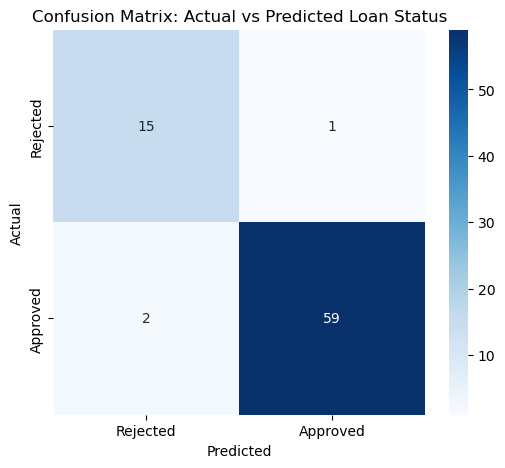

In [121]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(ytest, predict_output), annot=True, fmt="d", cmap="Blues", xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix: Actual vs Predicted Loan Status')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [122]:
# Identifying RandomForestClassifier parameters

params = model.get_params()
for key in params:
    print(key)

bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


In [123]:
param_grid = { 
    'n_estimators': [200],
    'max_features': ['sqrt', 'log2'], #2
    'max_depth' : [4,5,6,7,8],        #5
    'criterion' :['gini', 'entropy'], #2
    'min_samples_split' : [2, 5, 10], #3
    'min_samples_leaf' : [1, 2, 4],   #3
    'bootstrap' : [True, False]       #2
}

In [124]:
model_gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
model_gridsearch.fit(xtrain, ytrain)
print(model_gridsearch.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [125]:
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(xtrain, ytrain)
predict_output1 = model1.predict(xtest)

In [126]:
acc = accuracy_score(ytest, predict_output1)
print(f'Optimized Model Accuracy: {acc*100:.4f}%')
print(classification_report(ytest, predict_output1))

Optimized Model Accuracy: 96.1039%
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.97      0.98      0.98        61

    accuracy                           0.96        77
   macro avg       0.95      0.93      0.94        77
weighted avg       0.96      0.96      0.96        77



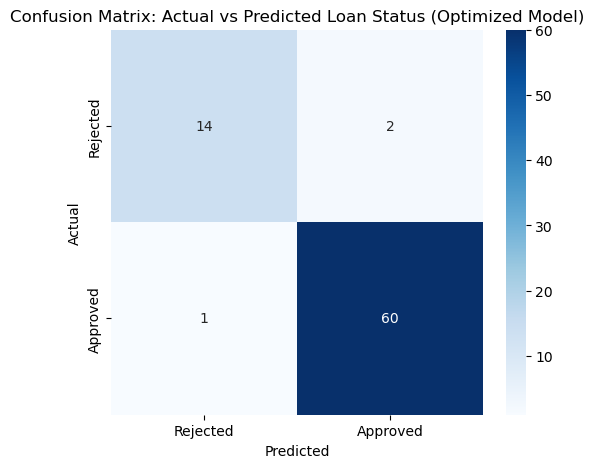

In [127]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(ytest, predict_output1), annot=True, fmt="d", cmap="Blues", xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix: Actual vs Predicted Loan Status (Optimized Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()